# California Housing Price Prediction
## Exploratory Data Analysis

Goal: Understand the dataset, identify target and features, and spot obvious patterns or issues before modeling.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

sns.set_theme(style="whitegrid")

dataset = fetch_california_housing(as_frame=True)
df = dataset.frame
# Detailed dataset description
# print(dataset.DESCR)

df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Basic structure

In [31]:
# Basic structure: Dataset size and info
display(df.shape)
display(df.info())

(20640, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

### Summary statistics

In [4]:
# Summary statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Missing values

In [12]:
# Check for missing values
df.isna().sum()
# df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

There are no missing values in the dataset.

### Target and features# Identify features and target

In [54]:
# Identify features and target
features = df.drop("MedHouseVal", axis=1).columns
target = "MedHouseVal"

features, target
print(f"Target variable:\n- {target}\n")

print(f"Features:")
for feature in features:
    print("-",feature)
print("")

Target variable:
- MedHouseVal

Features:
- MedInc
- HouseAge
- AveRooms
- AveBedrms
- Population
- AveOccup
- Latitude
- Longitude



### Correlations

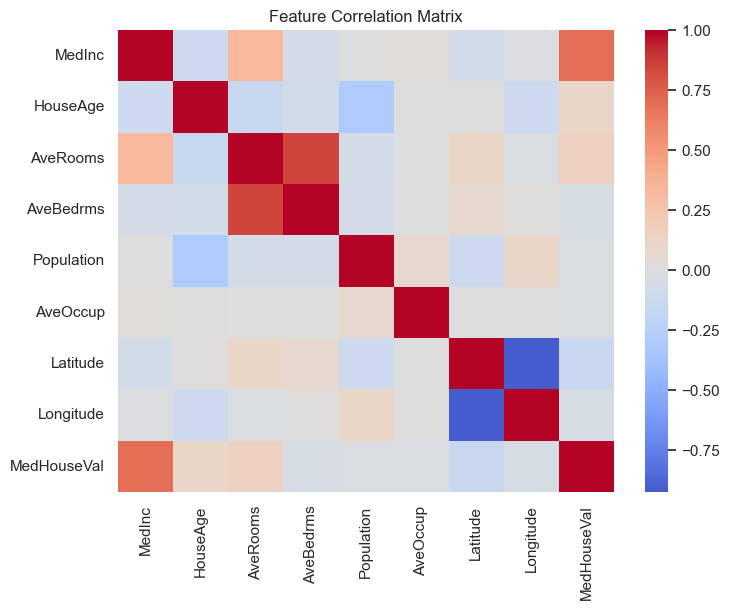

In [68]:
# Correltation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6)) 
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.savefig("../reports/corr_mat.png", dpi=150, bbox_inches="tight")
plt.show()

### Distributions

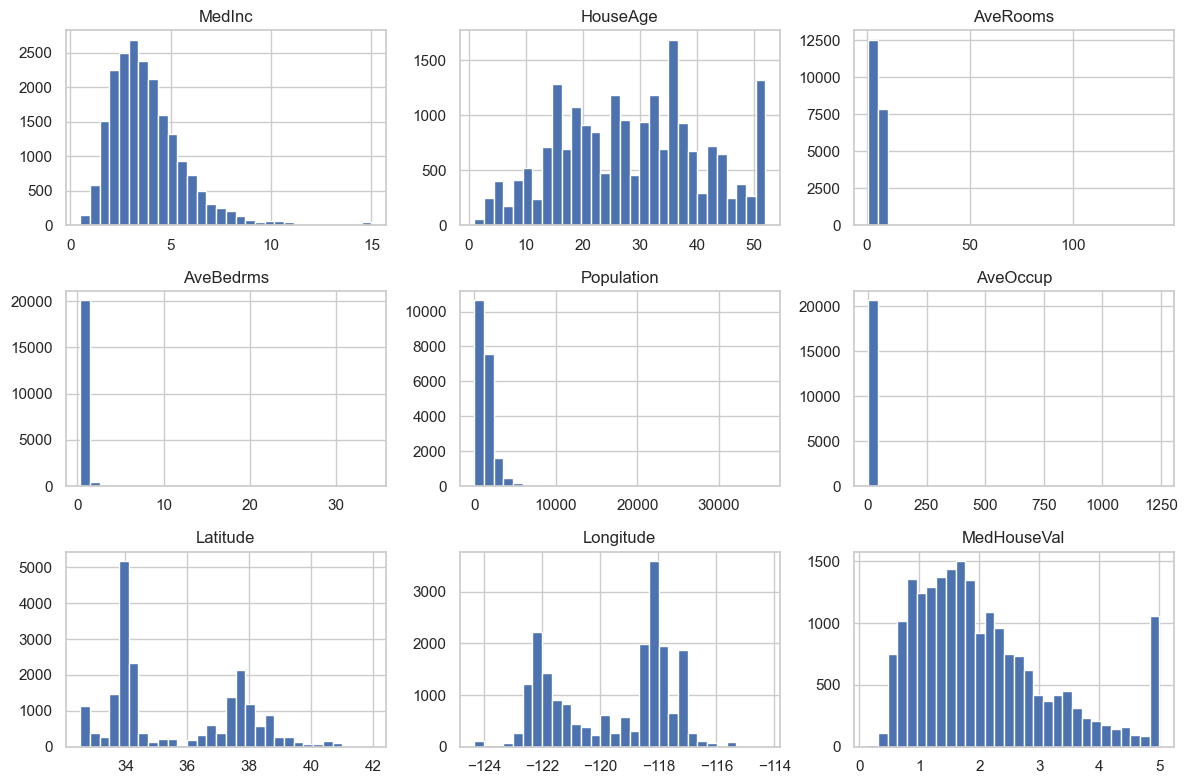

In [69]:
# Simple histograms for each feature and target 
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.savefig("../reports/histograms.png", dpi=150, bbox_inches="tight")
plt.show()

### Key relationships

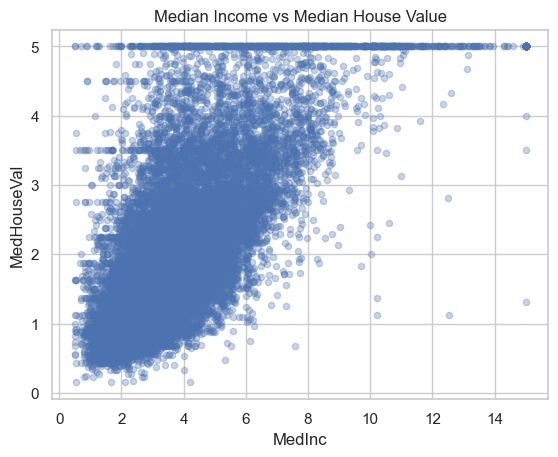

In [70]:
# Scatter plot of median income vs median house value
df.plot(kind="scatter", x="MedInc", y="MedHouseVal", alpha=0.3)
plt.title("Median Income vs Median House Value")
plt.savefig("../reports/medinc_vs_price.png", dpi=150, bbox_inches="tight")
plt.show()

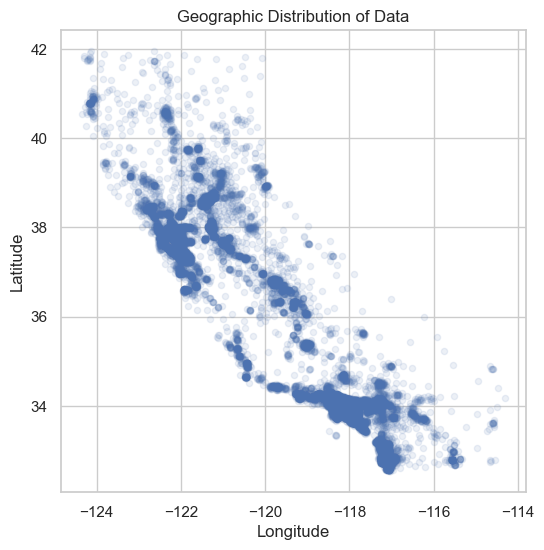

In [71]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(6,6))
plt.title("Geographic Distribution of Data")
plt.savefig("../reports/geographic_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

### EDA conclusions

Key observations: 
- Median inclome has the strongest correlation with house value.
- Target distribution is capped, which may affect regression performance.
- All features are numeric, simplifying preprocessing.
- Geographic location clearly matters.

Implications for modeling: 
- Scaling will be required.
- Linear models may underfit.
- Tree-based models are promising.